In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
data = pd.read_csv(r'C:\Users\AkinadeAbiodun\Documents\Top_250_EDA\Top250.csv')
data

,Rank,Restaurant,Content,Sales,YOY_Sales,Units,YOY_Units,Headquarters,Segment_Category
0,1,McDonald's,NaN,40412,4.9%,13846,-0.5%,NaN,Quick Service & Burger
1,2,Starbucks,NaN,21380,8.6%,15049,3.0%,NaN,Quick Service & Coffee Cafe
2,3,Chick-fil-A,While Popeyes got a lot of the chicken buzz in...,11320,13.0%,2470,5.0%,NaN,Quick Service & Chicken
3,4,Taco Bell,NaN,11293,9.0%,6766,2.7%,NaN,Quick Service & Mexican
4,5,Burger King,NaN,10204,2.7%,7346,0.2%,NaN,Quick Service & Burger
...,...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,NaN,129,-10.4%,18,-5.3%,NaN,Varied Menu
246,247,PDQ,NaN,127,-5.5%,56,-11.1%,NaN,Chicken
247,248,Lupe Tortilla,NaN,127,12.1%,25,8.7%,NaN,Mexican
248,249,Cook-Out Restaurant,NaN,126,10.1%,270,7.1%,NaN,Burger


### Information about the data

In [3]:
data.info

<bound method DataFrame.info of      Rank           Restaurant  \
0       1           McDonald's   
1       2            Starbucks   
2       3          Chick-fil-A   
3       4            Taco Bell   
4       5          Burger King   
..    ...                  ...   
245   246      Rainforest Cafe   
246   247                  PDQ   
247   248        Lupe Tortilla   
248   249  Cook-Out Restaurant   
249   250             Jollibee   

                                               Content  Sales YOY_Sales  \
0                                                  NaN  40412      4.9%   
1                                                  NaN  21380      8.6%   
2    While Popeyes got a lot of the chicken buzz in...  11320     13.0%   
3                                                  NaN  11293      9.0%   
4                                                  NaN  10204      2.7%   
..                                                 ...    ...       ...   
245                               

### Data cleaning

In [4]:
data.isnull().sum()

Rank                  0
Restaurant            0
Content             217
Sales                 0
YOY_Sales             0
Units                 0
YOY_Units             0
Headquarters        198
Segment_Category      0
dtype: int64

In [5]:
# droping content and Headquaters column since  the values missing are over 75%
data = data.drop(columns=['Content', 'Headquarters'])

In [6]:
data.dtypes

Rank                 int64
Restaurant          object
Sales                int64
YOY_Sales           object
Units                int64
YOY_Units           object
Segment_Category    object
dtype: object

### EDA

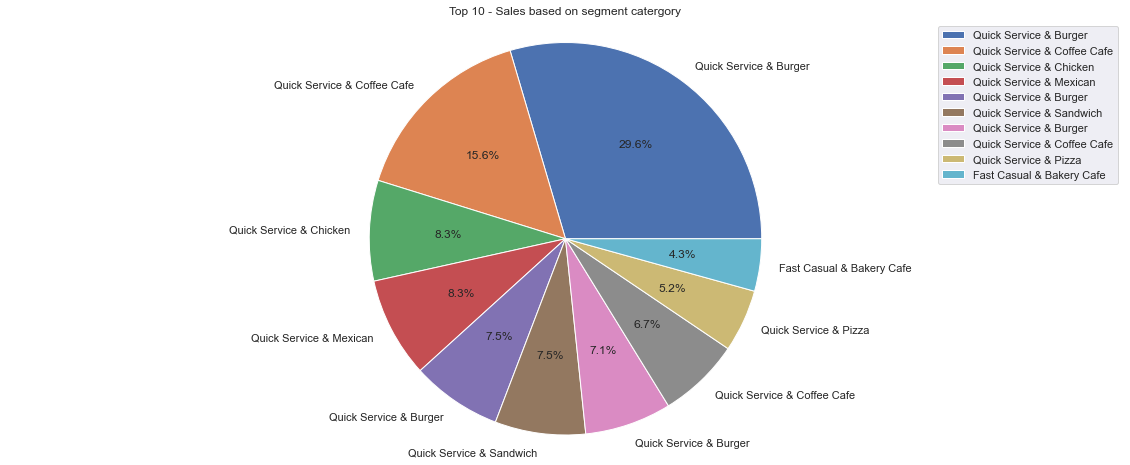

In [7]:
# piechart showing sales based on segment category
labels = data['Segment_Category'].head(10)
sizes = data['Sales'].head(10)

plt.figure(figsize=(20,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels)
plt.title('Top 10 - Sales based on segment catergory')

plt.show()

### Splitting the segment category to see how each individal category performed in sales

In [8]:
# splitting the segment
splitcategory=data['Segment_Category'].str.split('&', n=-1, expand=True)

In [9]:
data['Category'] = splitcategory[0]

In [10]:
data['Category'].unique()

array(['Quick Service ', 'Fast Casual ', 'Casual Dining ',
       'Family Dining ', 'Steak', 'Sports Bar', 'Fine Dining ', 'Mexican',
       'Varied Menu', 'Chicken', 'Italian/Pizza', 'Pizza', 'Seafood',
       'Frozen Desserts', 'Coffee Cafe', 'BBQ', 'Sandwich', 'Bakery Cafe',
       'Burger', 'Asian', 'Family Style', 'Asian/Noodle', 'Family Casual',
       'Snack', 'Healthy', 'Ethnic'], dtype=object)

In [11]:
data

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Category
0,1,McDonald's,40412,4.9%,13846,-0.5%,Quick Service & Burger,Quick Service
1,2,Starbucks,21380,8.6%,15049,3.0%,Quick Service & Coffee Cafe,Quick Service
2,3,Chick-fil-A,11320,13.0%,2470,5.0%,Quick Service & Chicken,Quick Service
3,4,Taco Bell,11293,9.0%,6766,2.7%,Quick Service & Mexican,Quick Service
4,5,Burger King,10204,2.7%,7346,0.2%,Quick Service & Burger,Quick Service
...,...,...,...,...,...,...,...,...
245,246,Rainforest Cafe,129,-10.4%,18,-5.3%,Varied Menu,Varied Menu
246,247,PDQ,127,-5.5%,56,-11.1%,Chicken,Chicken
247,248,Lupe Tortilla,127,12.1%,25,8.7%,Mexican,Mexican
248,249,Cook-Out Restaurant,126,10.1%,270,7.1%,Burger,Burger


In [12]:
data1 = data.groupby('Category').sum().sort_values('Sales')
data1

,Rank,Sales,Units
Category,,,
Ethnic,220,149,93
Healthy,185,184,102
Fine Dining,96,461,58
Asian,597,608,140
Snack,837,652,2092
Asian/Noodle,521,681,565
Family Casual,721,807,347
Frozen Desserts,714,918,1859
Coffee Cafe,726,925,1409


Text(0.5, 1.0, 'Top 10 - Sales based on catergory')

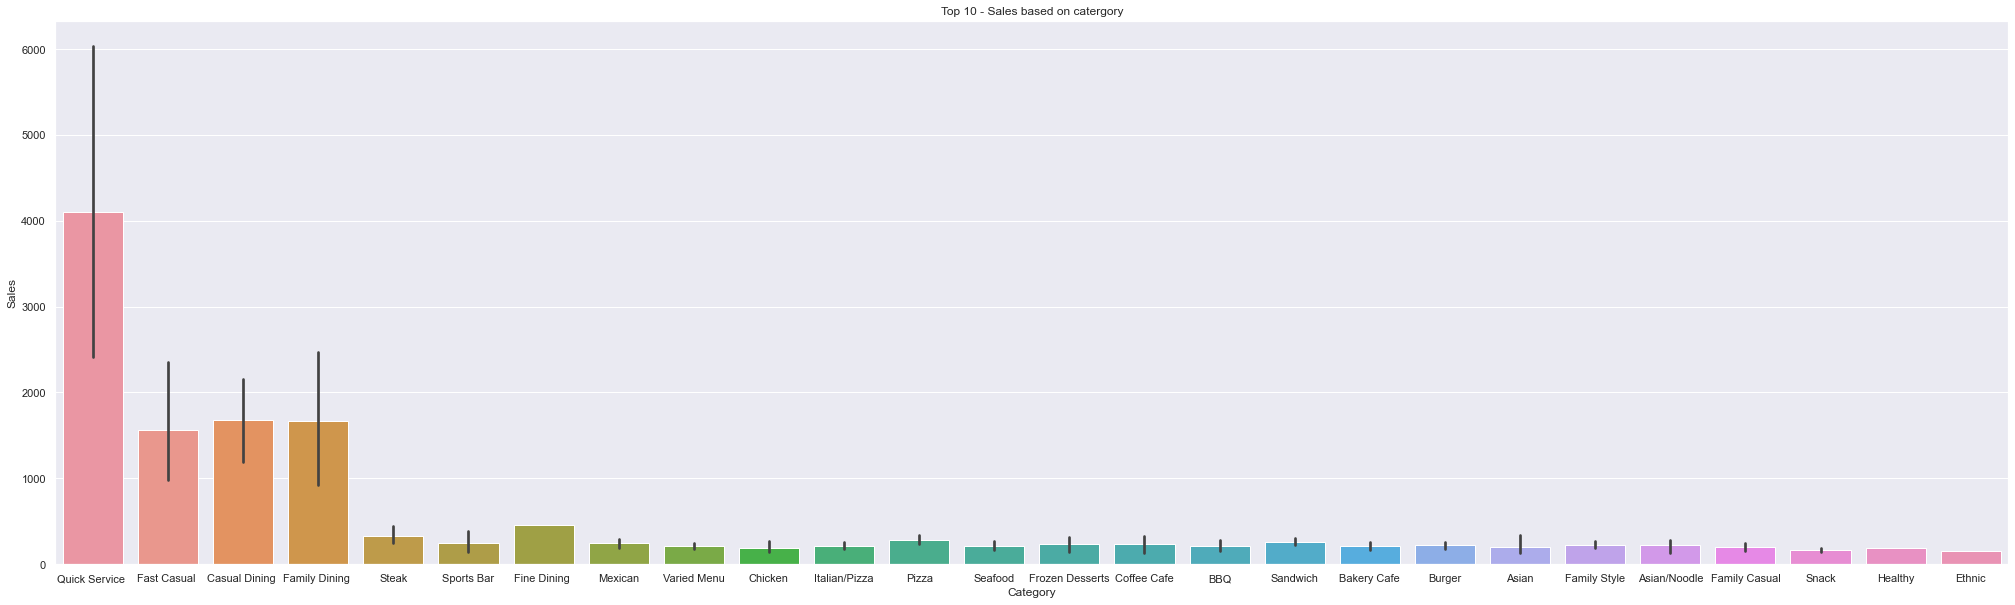

In [13]:
 #barchart showing sales based on category

plt.figure(figsize=(35,10))
sns.barplot(x=data['Category'], y= data['Sales'])

plt.title('Top 10 - Sales based on catergory')

### Sales based on resturant(top10)

Text(0.5, 1.0, 'Top 10 - Sales based on resturant')

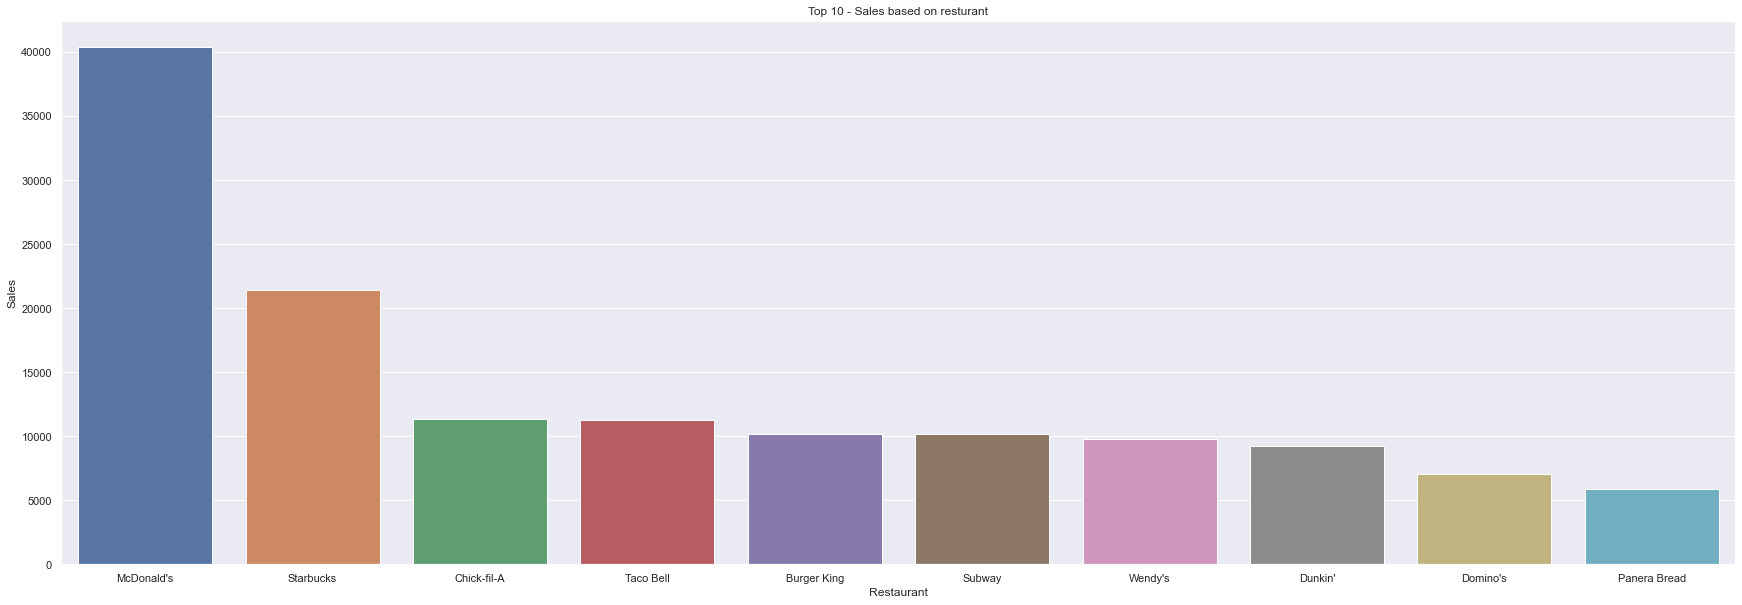

In [14]:
plt.figure(figsize=(30,10))
sns.barplot(x=data['Restaurant'].head(10),y=data['Sales'].head(10))

plt.title('Top 10 - Sales based on resturant')

### Year-over-Year increase in sales based Category

In [15]:
data['YOY_Sales']=data['YOY_Sales'].str.strip('%')
data['YOY_Sales']=data['YOY_Sales'].astype(float)

Text(0.5, 1.0, 'YOY-Sales based on catergory')

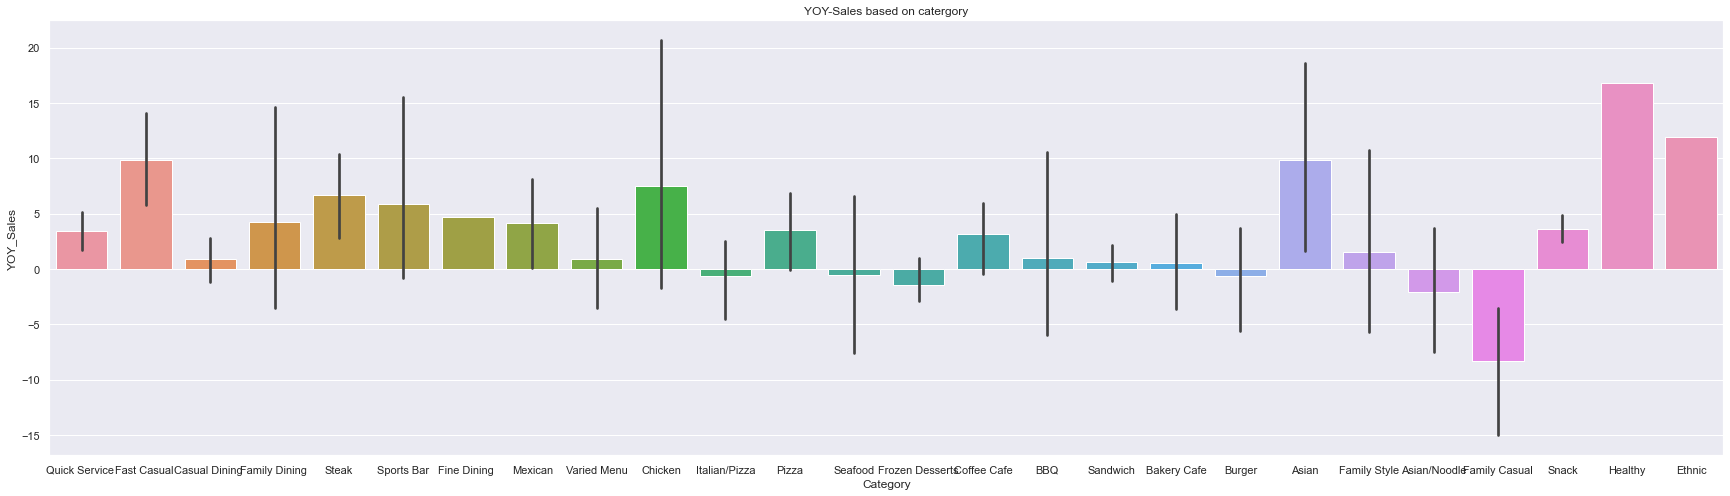

In [16]:
plt.figure(figsize=(30,8))
sns.barplot(x=data['Category'], y= data['YOY_Sales'])

plt.title('YOY-Sales based on catergory')

### year on year sales based on resturant

In [17]:
yoy_sales_postive=data[data['YOY_Sales']>0]
yoy_sales_negative=data[data['YOY_Sales']<0]

Text(0.5, 1.0, 'Top 10 - YOY-Sales based on resturant')

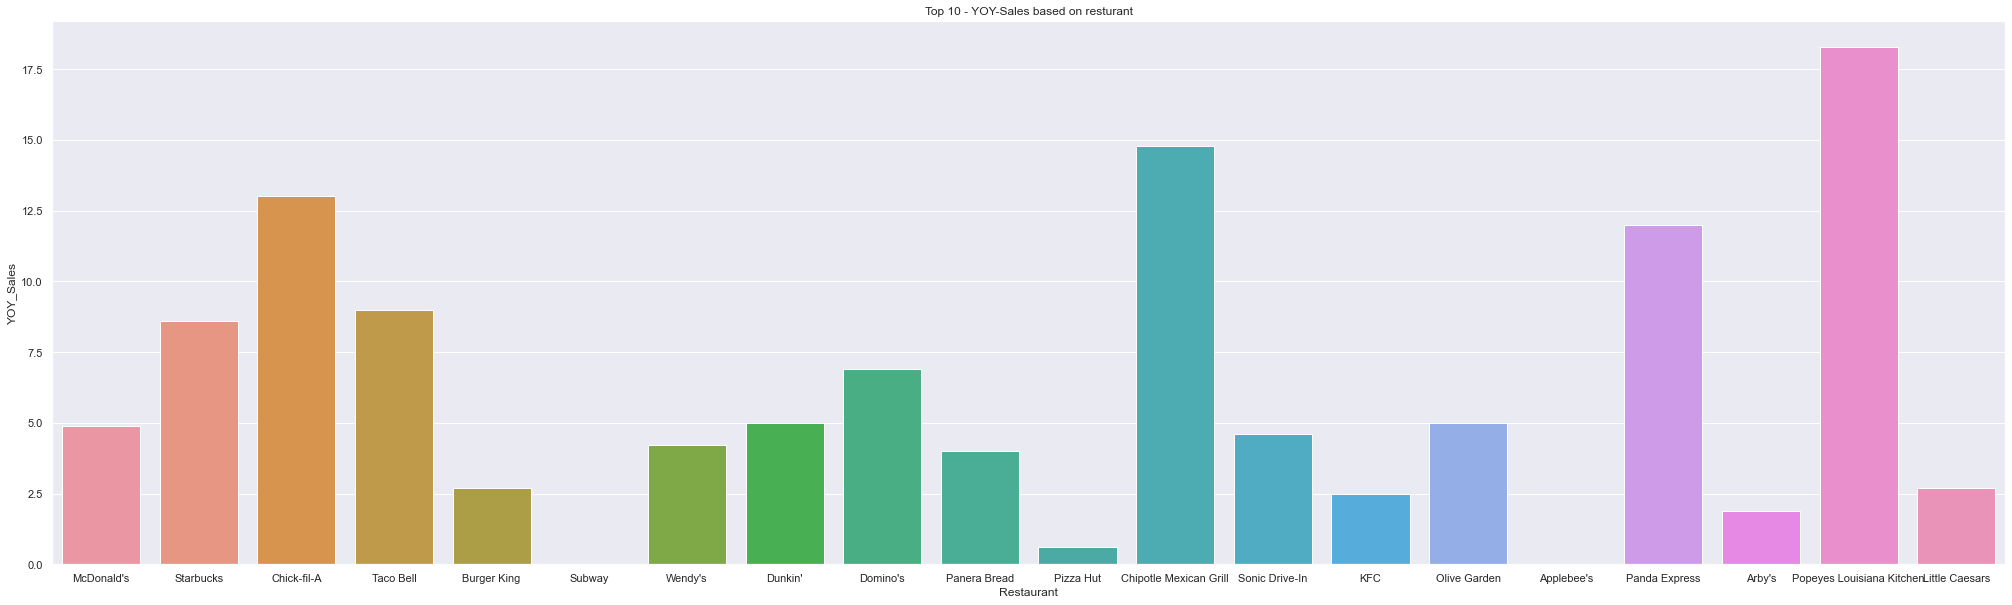

In [18]:
plt.figure(figsize=(35,10))
sns.barplot(x=data['Restaurant'].head(20),y=yoy_sales_postive['YOY_Sales'].head(20))
plt.title('Top 10 - YOY-Sales based on resturant')

### Year on year increase in units based on segment category

In [19]:
data['YOY_Units']=data['YOY_Units'].str.strip('%')
data['YOY_Units']=data['YOY_Units'].astype(float)

In [20]:
yoy_units_postive=data[data['YOY_Units']>0]
yoy_units_negative=data[data['YOY_Units']<0]

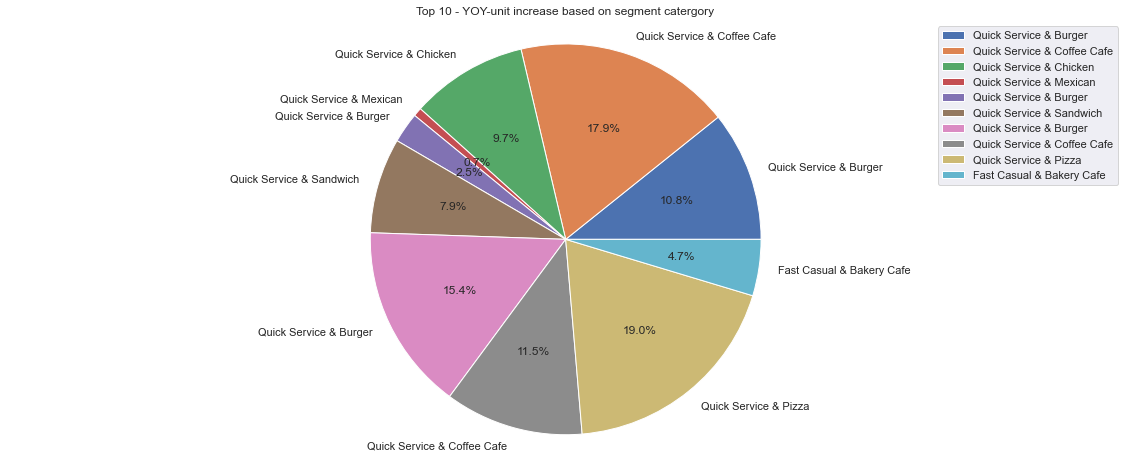

In [21]:
# piechart showing sales based on segment category
labels = data['Segment_Category'].head(10)
sizes = yoy_units_postive['YOY_Units'].head(10)

plt.figure(figsize=(20,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.legend(labels)
plt.title('Top 10 - YOY-unit increase based on segment catergory')

plt.show()

### Year on year unit increase based on resturant

Text(0.5, 1.0, 'Top 10 - YOY unit increase based on resturant')

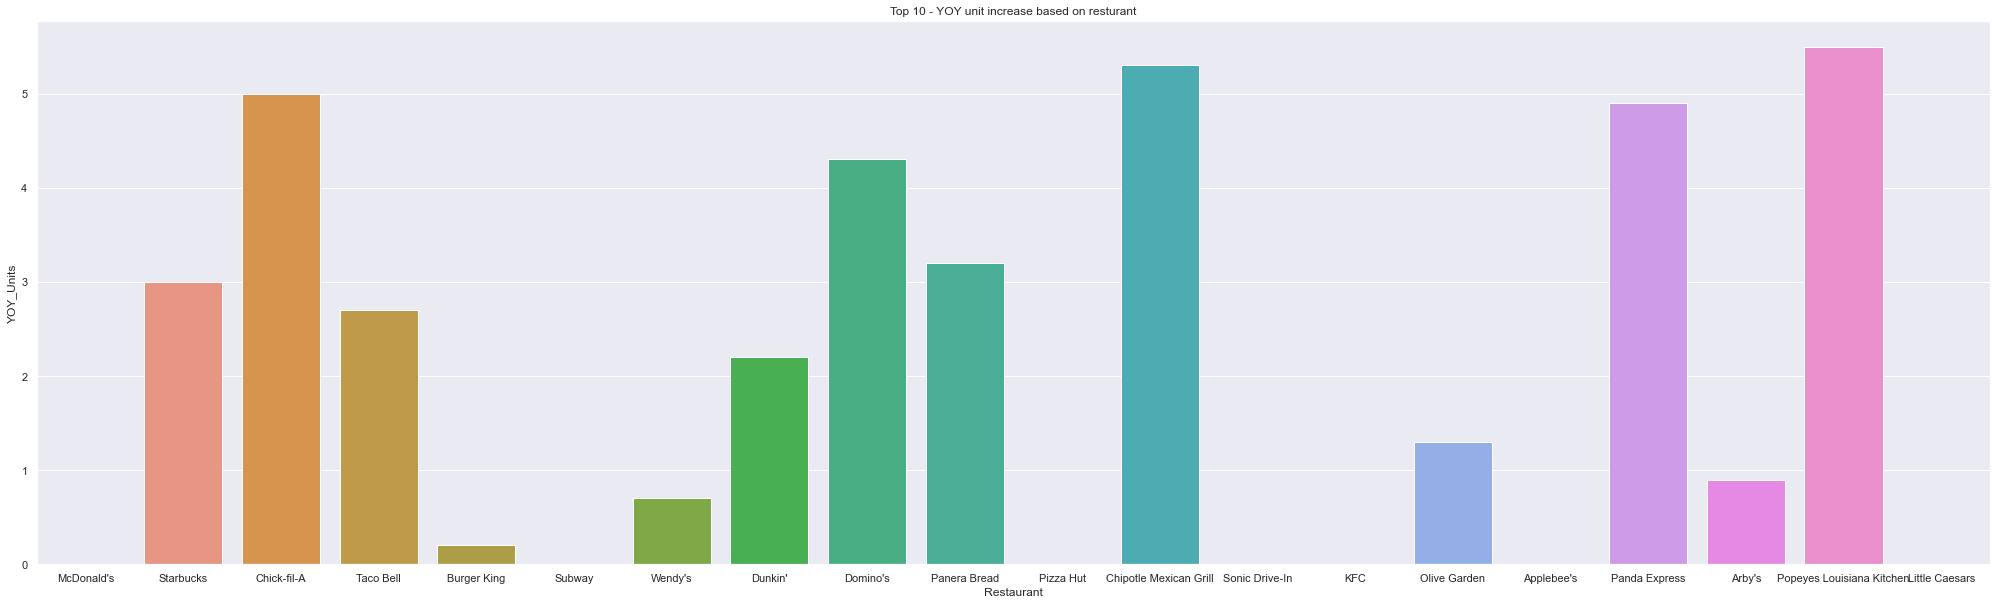

In [22]:
plt.figure(figsize=(35,10))
sns.barplot(x=data['Restaurant'].head(20),y=yoy_units_postive['YOY_Units'].head(20))
plt.title('Top 10 - YOY unit increase based on resturant')

### Top sales of various choice foods

In [23]:
#pizza
pizza = data[data['Category']=='Pizza']
pizza


,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Category
105,106,Cicis,410,-1.4,420,0.7,Pizza,Pizza
108,109,Chuck E. Cheese's,381,-0.5,537,1.3,Pizza,Pizza
112,113,Blaze Pizza,366,12.4,313,5.7,Pizza,Pizza
124,125,Jet's Pizza,331,-1.8,383,-1.0,Pizza,Pizza
140,141,Pizza Ranch,269,7.3,212,2.9,Pizza,Pizza
152,153,Godfather's Pizza,250,4.9,569,3.8,Pizza,Pizza
162,163,Sbarro,218,-4.0,300,-2.6,Pizza,Pizza
186,187,Mountain Mike's Pizza,181,10.9,215,5.4,Pizza,Pizza
190,191,Donatos Pizza,179,3.8,165,3.1,Pizza,Pizza


Text(0.5, 1.0, 'Top 10 - resturant pizza sales')

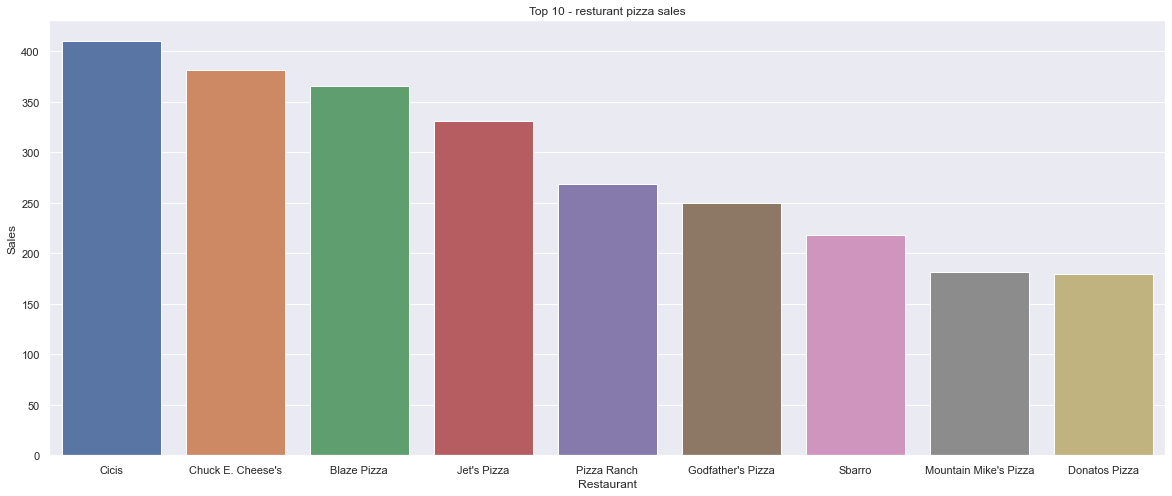

In [24]:
plt.figure(figsize=(20,8))
sns.barplot(x=pizza['Restaurant'],y=pizza['Sales'])
plt.title('Top 10 - resturant pizza sales')

In [25]:
#burger
burger = data[data['Category']=='Burger']
burger

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Category
117,118,Krystal Co.,343,-9.0,318,-10.7,Burger,Burger
133,134,Jack's,290,9.8,176,8.6,Burger,Burger
138,139,Rally's Hamburgers,275,-3.5,290,-3.7,Burger,Burger
146,147,Smashburger,265,-6.5,312,-3.4,Burger,Burger
159,160,A&W All-American Food,227,1.8,575,-6.5,Burger,Burger
182,183,Fuddruckers,185,-15.8,138,-11.5,Burger,Burger
189,190,Farmer Boys,179,1.7,93,1.1,Burger,Burger
210,211,Wayback Burgers,159,2.0,143,0.7,Burger,Burger
233,234,BurgerFi,138,3.0,112,7.7,Burger,Burger
248,249,Cook-Out Restaurant,126,10.1,270,7.1,Burger,Burger


Text(0.5, 1.0, 'Top 10 - resturant burger sales')

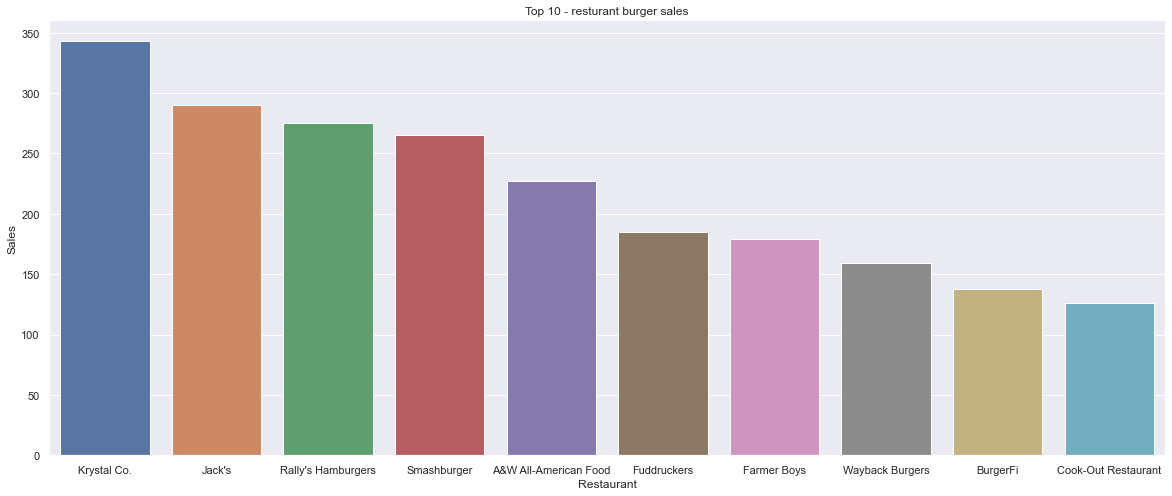

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x=burger['Restaurant'],y=burger['Sales'])
plt.title('Top 10 - resturant burger sales')

In [27]:
#sanwich
sandwich = data[data['Category']=='Sandwich']
sandwich


,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Category
115,116,Zoes Kitchen,348,1.2,256,-1.5,Sandwich,Sandwich
123,124,Schlotzsky's,335,-0.5,373,0.5,Sandwich,Sandwich
147,148,Wienerschnitzel,265,3.6,330,1.5,Sandwich,Sandwich
156,157,Fazoli's,238,2.8,215,0.0,Sandwich,Sandwich
160,161,Newk's Eatery,227,0.4,121,-0.8,Sandwich,Sandwich
169,170,Penn Station East Coast Subs,201,0.8,306,-1.3,Sandwich,Sandwich
174,175,Which Wich,193,-4.2,372,-3.9,Sandwich,Sandwich


Text(0.5, 1.0, 'Top 10 - resturant sandwich sales')

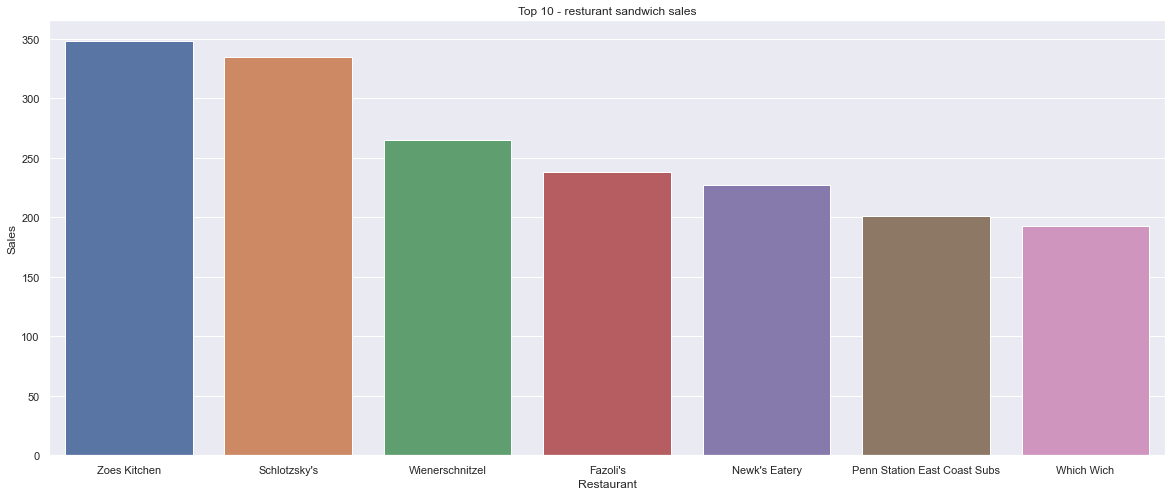

In [28]:
plt.figure(figsize=(20,8))
sns.barplot(x=sandwich['Restaurant'],y=sandwich['Sales'])
plt.title('Top 10 - resturant sandwich sales')

In [29]:
#chicken
chicken = data[data['Category']=='Chicken']
chicken

,Rank,Restaurant,Sales,YOY_Sales,Units,YOY_Units,Segment_Category,Category
103,104,Pollo Tropical,425,-2.1,174,3.0,Chicken,Chicken
185,186,Golden Chick,183,6.7,184,0.5,Chicken,Chicken
209,210,Lee's Famous Recipe Chicken,161,-2.3,129,-1.5,Chicken,Chicken
214,215,Chicken Salad Chick,153,39.5,144,38.5,Chicken,Chicken
228,229,Pollo Campero,143,1.1,78,-2.5,Chicken,Chicken
246,247,PDQ,127,-5.5,56,-11.1,Chicken,Chicken
249,250,Jollibee,126,15.2,40,11.1,Chicken,Chicken


Text(0.5, 1.0, 'Top 10 - resturant chiken sales')

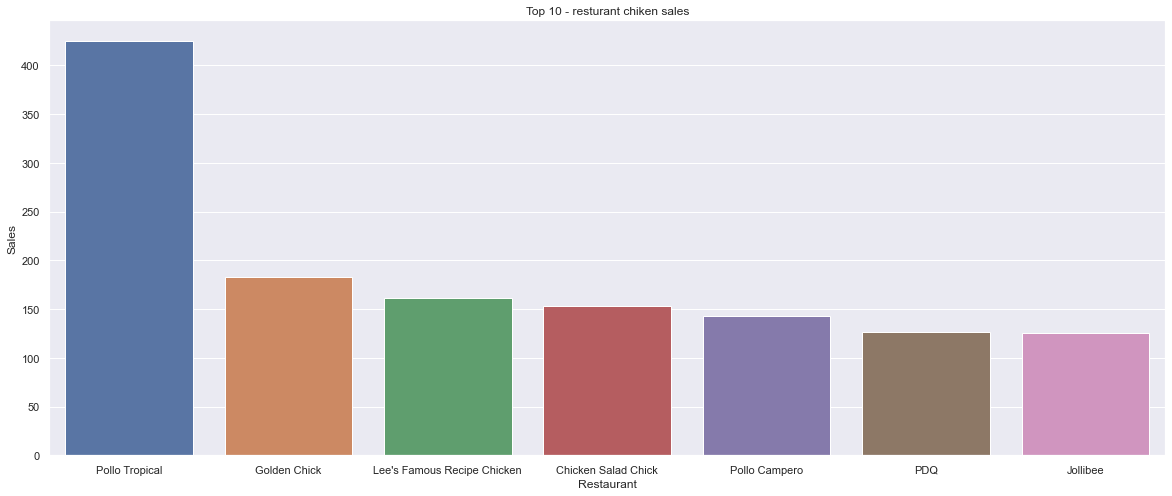

In [30]:
plt.figure(figsize=(20,8))
sns.barplot(x=chicken['Restaurant'],y=chicken['Sales'])
plt.title('Top 10 - resturant chiken sales')